# Convolutional Neural Networks and Computer Vision with TensorFlow
> Notebook demonstrates Convolutional Neural Networks for Computer vision applications with TensorFlow

- toc: true 
- badges: true
- comments: true
- categories: [DeepLearning, NeuralNetworks, TensorFlow, Python]
- image: images/nntensorflowcnn.png

## Convolutional Neural Networks and Computer Vision with TensorFlow

This Notebook is an account of working for the Udemy course by Daniel Bourke: TensorFlow Developer Certificate in 2022: Zero to Mastery

Concepts covered in this Notebook:  
* Getting a dataset to work with 
* Architecture of a convolutional neural network(CNN) with TensorFlow.
* An end-to-end binary image classification problem
* Steps in modelling with CNNs:
  * Creating a CNN
  * Compiling a model
  * Fitting a Model
  * evaluating a model
* An end-to-end mutli-class image classification problem
* Making predictions on our own custom images. 

### Introduction to CNNs and Computer vision with TensorFlow  
Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car, recognizing the car infront.

### Architecture of a CNN

| Hyperparameter/Layer type | What does it do? | Typical Values |
| --- | --- | --- |
| Input image(s) | Target images you'd like to discover patterns in | Whatever you can take a photo or video of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with `tf.keras.layers.ConvXD` (X can be multiple values |
| Hidden activation | Adds non-linearity to learned features(non-straight lines) | Usually ReLU (`tf.keras.activations.relu) |
| Pooling layer | Reduces the dimensionality of learned image features | Average(`tf.keras.layers.AvgPool2D`) or Max(`tf.keras.layers.MaxPool2D`) |
| Fully Connected layer | Further refines learned features from convolution layers | tf.keras.layers.Dense |
| Output layer | Takes learned features and outputs them in shape of target labels | output_shape = [number_of_classes] (e.g. 3 for pizza, steack or sushi) |
| Output activation | Adds non-linearity to output layer | `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.activations.softmax` (multi-class classification) |

An example of a CNN model in TensorFlow:  

```
# 1. Create a CNN Model (same as Tiny VGG model)
cnn_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size = 3, # can also be (3,3)
                         activation = 'relu',
                         input_shape = (224,224,3)), # Specify the input shape(height, width, colour channels)
  tf.keras.layers.Conv2D(10,3, activation = "relu"),
  tf.keras.layers.MaxPool2D(pool_size= 2, # pool_size can be (2,2)
                            padding = "valid"), # Padding can also be 'same'
  tf.keras.layers.Conv2D(10,3, activation = "relu"),
  tf.keras.layers.Conv2D(10,3, activation = "relu"), # activation = 'relu' == tf.keras.layers.Activaions(tf.nn.relu)
  tf.keras.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = "sigmoid") # Binary activation output
])

# 2. Compile the model
cnn_model.compile(loss = "binary_crossentropy",
                  optimizer = tf.keras.optimizers.Adam(),
                  metrics = ["accuracy"])

# 3. Fit the model
history = cnn_model.fit(train_data, epochs = 5)

```

### Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): [kaggle Food101 Dataset](https://www.kaggle.com/dansbecker/food-101)

However we've modified it to only use two classes (pizza & steak) using the [image_data_modification Notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)  

**Note:** We start with smaller dataset so we can experiment quickly and figure what works and what doesn't work before scaling up.

In [1]:
# Get the Dataset for pizza steak classification

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-02-17 16:13:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   152MB/s    in 0.7s    

2022-02-17 16:13:57 (152 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data


In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train


pizza  steak


In [4]:
#collapse-output
# Let's check what is inside the pizza training data
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
# The extra file in our pizza steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb 17 16:13 .
drwxr-xr-x 1 root root 4096 Feb 17 16:13 ..
drwxr-xr-x 4 root root 4096 Feb 17 16:13 test
drwxr-xr-x 4 root root 4096 Feb 17 16:13 train


In [7]:
# Another way to find out how many images are in  a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

**Note:** To visualize our images, first let's get the class names programmatically

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
# Created a list of classnames from subdirectories
print(class_names)

['pizza' 'steak']


In [9]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
plt.style.use('dark_background')


def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


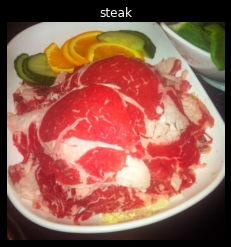

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [11]:
#collapse-output
import tensorflow as tf

tf.constant(img)


<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[19, 11,  9],
        [21, 13, 11],
        [22, 14, 12],
        ...,
        [19, 36,  2],
        [19, 36,  2],
        [21, 38,  2]],

       [[20, 12, 10],
        [22, 14, 12],
        [23, 15, 13],
        ...,
        [19, 36,  2],
        [18, 35,  1],
        [19, 36,  2]],

       [[21, 13, 11],
        [22, 14, 12],
        [24, 16, 14],
        ...,
        [20, 35,  2],
        [19, 34,  1],
        [19, 34,  1]],

       ...,

       [[29, 10, 12],
        [31, 11, 12],
        [34, 10,  8],
        ...,
        [ 1,  1,  3],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       [[27, 11, 14],
        [29, 11, 11],
        [32, 11, 10],
        ...,
        [ 2,  2,  4],
        [ 1,  1,  3],
        [ 1,  1,  3]],

       [[25, 10, 13],
        [26, 10, 11],
        [32, 11, 10],
        ...,
        [ 2,  1,  6],
        [ 1,  0,  5],
        [ 1,  0,  5]]], dtype=uint8)>

In [12]:
# View the image shape
img.shape # Returns width, height, colour channels

(512, 512, 3)

In [13]:
#collapse-output
# Normalize the pixel values (Data preprocessing step)
img/255.

array([[[0.0745098 , 0.04313725, 0.03529412],
        [0.08235294, 0.05098039, 0.04313725],
        [0.08627451, 0.05490196, 0.04705882],
        ...,
        [0.0745098 , 0.14117647, 0.00784314],
        [0.0745098 , 0.14117647, 0.00784314],
        [0.08235294, 0.14901961, 0.00784314]],

       [[0.07843137, 0.04705882, 0.03921569],
        [0.08627451, 0.05490196, 0.04705882],
        [0.09019608, 0.05882353, 0.05098039],
        ...,
        [0.0745098 , 0.14117647, 0.00784314],
        [0.07058824, 0.1372549 , 0.00392157],
        [0.0745098 , 0.14117647, 0.00784314]],

       [[0.08235294, 0.05098039, 0.04313725],
        [0.08627451, 0.05490196, 0.04705882],
        [0.09411765, 0.0627451 , 0.05490196],
        ...,
        [0.07843137, 0.1372549 , 0.00784314],
        [0.0745098 , 0.13333333, 0.00392157],
        [0.0745098 , 0.13333333, 0.00392157]],

       ...,

       [[0.11372549, 0.03921569, 0.04705882],
        [0.12156863, 0.04313725, 0.04705882],
        [0.13333333, 0

### An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need to:  
* Load our images
* Preprocess our images
* Compile our CNN
* Fit the CNN to our training data


In [14]:
# Epoch #1 : Took around 100s 

It took so much time for one epoch becuase we are not using any GPU accelerator. It doesn't have anything to do with our code but convolution layers take up a lot of computation and for a dataset that big the normal CPU takes a lot of time. GPU are excellent in number crunching with very fast speeds. So, let's change the runtime type and Use GPU Accelerator.

In [17]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1)
# This is also called scaling/normalization.
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32, # Number of image to process at a time
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)
valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Build a CNN model(same as tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters = 10,
                         kernel_size = 3,
                         activation = "relu",
                         input_shape = (224,224,3)),    
  tf.keras.layers.Conv2D(10,3,activation = "relu"),
  tf.keras.layers.MaxPool2D(pool_size = 2,
                            padding = "valid"),
  tf.keras.layers.Conv2D(10,3, activation = "relu"),
  tf.keras.layers.Conv2D(10,3, activation = "relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])


# Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch= len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 12s 245ms/step - loss: 0.5455 - accuracy: 0.7160 - val_loss: 0.4042 - val_accuracy: 0.8160
Epoch 2/5
47/47 [==============================] - 11s 238ms/step - loss: 0.4120 - accuracy: 0.8240 - val_loss: 0.3212 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3803 - accuracy: 0.8400 - val_loss: 0.3324 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3441 - accuracy: 0.8547 - val_loss: 0.3056 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.3099 - accuracy: 0.8653 - val_loss: 0.3038 - val_accuracy: 0.8660


If it is taking long for the first epoch make sure you have changed the runtime type to GPU. You can change it by going to the runtime option and in the change runtime type selected GPU as your hardware accelerator.

Our model above performed really well. It is prediction at an accuracy of 87% on the validation data( the model hasn't seen this data during training)

In [18]:
# Let's get the summary of our model 
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

### Using the same model as before (Non-CNN model)  

Let's replicate the model we have built in a previous post.

The model we are building is from [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.46285&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)



In [19]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")                               
])

# Compile the model
model_2.compile(loss = "binary_crossentropy",
                optimizer =tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps = len(valid_data))



Epoch 1/5
47/47 [==============================] - 10s 207ms/step - loss: 0.6961 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20 times more parameters than our CNN(model_1), model_2 performs poorly.


In [21]:
# Set the random seed
tf.random.set_seed(42)

# Create the model(same as above but let's modify it for better)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224,224,3)),                               
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(100, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")                               
])

# 2. Compile the model
model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 3. Fit the model
history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 3.2629 - accuracy: 0.6147 - val_loss: 0.4939 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6015 - accuracy: 0.7340 - val_loss: 1.2933 - val_accuracy: 0.5620
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6752 - accuracy: 0.7227 - val_loss: 2.5866 - val_accuracy: 0.5020
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.8349 - accuracy: 0.7020 - val_loss: 0.5200 - val_accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 10s 204ms/step - loss: 0.5538 - accuracy: 0.7507 - val_loss: 0.4485 - val_accuracy: 0.8020


In [22]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


The model_3 has around 15 million parameters. Model_3 has around 500 times more parameters to train than the model_2 (the CNN model). And this shows the true power of convolution neural networks(CNN)

**Note:**   
You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. In several cases that will be true. But the difference here is the two different styles of model we are using.  
**Convolutional neural network seeks to sort out and learn the most important pattterns in an image**. So even though there are less number of parameters in our CNN these are often more helpful in deciphering from visual data.

### Binary Classification:

1. Getting more familiar with our dataset
2. Preprocess the data(eg. scaling/Normalization)
3. Create a model (start with a basic one) 
4. Fit the model
5. Evaluate the model
6. Adjust different paramters and improve the model (try to beat any benchmarks if exist or make your own benchmark)
7. Repeat the steps to get the best possible result(experiment, experiment, experiment)


#### 1. Getting more familiar with our data

Image shape: (288, 512, 3)
Image shape: (512, 512, 3)


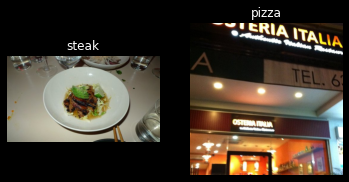

In [23]:
# Visualize the data(getting familiar with data)
import os
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/" , "pizza")

#### Preprocess the data

In [24]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather than look at all 10,000 images at one time, a model might only look at 32 at a time.  
It does this for a couple or reasons:  
1. 10,000 images(or more) might not fit into the memory of your processor(GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in thd model not begin able to learn very well.  
3. **Why a mini-batch size of 32?** 
<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Training with large minibatches is bad for your health.<br>More importantly, it&#39;s bad for your test error.<br>Friends dont let friends use minibatches larger than 32. <a href="https://t.co/hxx2rGhIG1">https://t.co/hxx2rGhIG1</a></p>&mdash; Yann LeCun (@ylecun) <a href="https://twitter.com/ylecun/status/989610208497360896?ref_src=twsrc%5Etfw">April 26, 2018</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

In [25]:
# we can check the 
!nvidia-smi

Thu Feb 17 16:18:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |   1305MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)


In [27]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                               target_size = (224,224), # Target size of images(height,width)
                                               class_mode = "binary", # type of data you are working with
                                               batch_size = 32) # size of mini-batches to load data into 

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode = "binary",
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
# Get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in the batch
len(images), len(labels)

(32, 32)

In [29]:
# How many batches are there?
len(train_data) # No. of total images/ mini-batch size

47

In [30]:
#collapse-output
# Get the first two images
images[:2], images[0].shape # we get the output as array of pixel values 

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [31]:
# View the first batch of labels
labels # we get to know which label by crosschecking the labels with the input data

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

#### 2. Create a CNN Model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment, as you keep experimenting we try to do more better than our basline.  

> **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required(e.g. look at which current model is performing best in the field for your problem)

| Hyperparameter name | What does it do? | Typical valuse |
| --- | --- | --- |
| Filters | Decides how many filters should pass over an input tensor (e.g. sliding windows over an image) | 10, 32, 64, 128 (higher values lead to more complex models)  |
| Kernel size(also called filter size) | Determines the shape of the filters(sliding windows) over the outputs | 3,5, 7 (lower values learn smaller features, higher values learn larger features) |
| Padding | Pads the target tensor with zeros (if "same") to preserver input shape. Or leaves in the target tensor as is (if "valid"), loweing the output shape. | "same" or "valid" |
| Strides | The number of steps a filter takes across an image at a time(eg. if strides = 1, a fileter moves across an image 1 pixel at a time) | 1 (default), 2 |

**Resource:** [CNN-Explainer](https://poloclub.github.io/cnn-explainer/)

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
import tensorflow as tf
# Create the model
model_4 = Sequential([
  Conv2D(filters = 10, # filters is the number of sliding windows going across an input
         kernel_size = 3, # the size of the sliding window going across an input
         strides =1, # the size of the step the sliding window takes across an input
         padding = "valid", # If "same" padding output is the same shape as input but "valid" output shape gets compressed.
         activation = "relu", 
         input_shape = (224,224,3)),
  Conv2D(10,2, activation = "relu"),
  Conv2D(10,3 , activation = "relu"),
  Flatten(),
  Dense(1, activation = "sigmoid") # Output layer(working with binary classification so only 1 output neuron)

])

# Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])


In [34]:
# Get the summary of our model
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 221, 221, 10)      410       
                                                                 
 conv2d_14 (Conv2D)          (None, 219, 219, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 479610)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 479611    
                                                                 
Total params: 481,211
Trainable params: 481,211
Non-trainable params: 0
_________________________________________________________________


#### 4. Fit the Model

In [35]:
# Check the lenghts of training and test data generators we created before
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 251ms/step - loss: 1.0757 - accuracy: 0.6960 - val_loss: 0.4364 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4187 - accuracy: 0.8147 - val_loss: 0.4065 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3305 - accuracy: 0.8633 - val_loss: 0.3746 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 15s 313ms/step - loss: 0.1696 - accuracy: 0.9420 - val_loss: 0.4955 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 20s 424ms/step - loss: 0.0709 - accuracy: 0.9807 - val_loss: 0.4630 - val_accuracy: 0.8080


In [37]:
model_4.evaluate(test_data)

16/16 [==============================] - 4s 258ms/step - loss: 0.4630 - accuracy: 0.8080


[0.4629989564418793, 0.8080000281333923]

#### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.


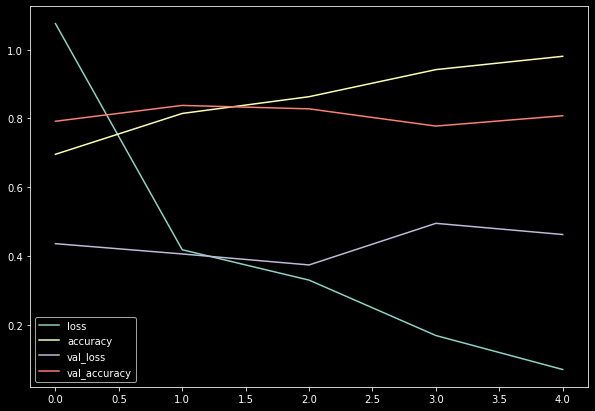

In [38]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [39]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics

  """

  loss  = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we run for?

  # Plot the loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** tht training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

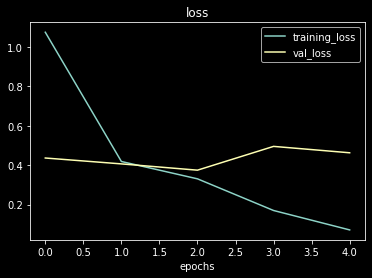

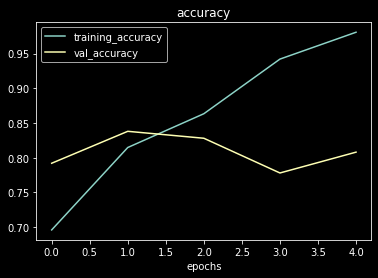

In [40]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

#### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
 0. Create a baseline
 1. Beat the baseline by overfitting a larger model.
 2. Reduce the overfitting  
 
Ways to induce overfitting:

 * Increase the number of conv layers
 * Increase the number of conv filters

Reduce overfitting:

* Add data augmentation
* Add regularization (such as MaxPool2D)
* Add more data...  

**Note:** Reducing overfitting also known as regularization.

In [41]:
# Create a model
model_5 = Sequential([
  Conv2D(10,3, activation = "relu", input_shape=(224,224,3)),
  MaxPool2D(pool_size = 2),
  Conv2D(10,3, activation = "relu"),
  MaxPool2D(),
  Conv2D(10,3, activation= "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")                   
])


In [43]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [44]:
history_5 = model_5.fit(train_data,
                        epochs =5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 220ms/step - loss: 0.6293 - accuracy: 0.6480 - val_loss: 0.4676 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 10s 212ms/step - loss: 0.4690 - accuracy: 0.7820 - val_loss: 0.4022 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4438 - accuracy: 0.8033 - val_loss: 0.3693 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3932 - accuracy: 0.8340 - val_loss: 0.3502 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4066 - accuracy: 0.8187 - val_loss: 0.3302 - val_accuracy: 0.8660


In [45]:
# Get the summary of the model
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

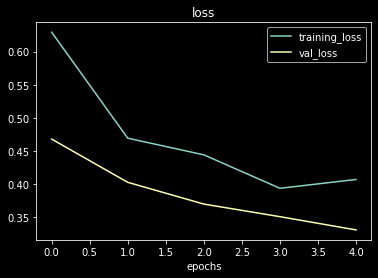

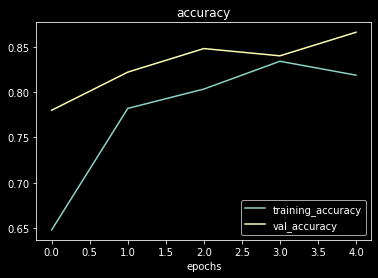

In [47]:
# Plot loss curves
plot_loss_curves(history_5)

### Finding Data Augmentation

In [66]:
# Create ImageDataGenerator training and
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range= 0.2, # how much do you want to rotate an image?
                                             shear_range= 0.2, # how much do you want to shear an image?
                                             zoom_range= 0.2, # zoom in randomly on an image
                                             width_shift_range = 0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip= True) # flipping the image

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without datat augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale =1/255.)

**Question:**  What is data augmentation?  

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our modesl to learn more genearalizable patterns. Altering means adjusting the rotation of an image, flipping it, cropping it or something similar.

#### Improving a model(from data perspective)  

| Method to improve a model(reduce overfitting) | What does it do? |
| --- | --- |
| More data | Gives a model more of a chance to learn patterns between samples(e.g. if model is performing poorly on images of pizza, show it more images of pizza) |
| Data augmentation | Increase the diversity of your training dataset without collecting more data(e.g. take your photos of pizza and randomly rotate them 30 deg.). Increased diversity forces a model to learn more generalizable patterns |
| Better data | Not all data samples are created equally. Removing poor samples from or adding better samples to your dataset can improve your model's performance |
| Use transfer learning | Take a model's pre-trained patterns from one problem and tweak them to suit your own problem. For example, take a model trained on pictures of cars to recognise pictures of trucks |  

Let's write some code to visualize data augmentation.

In [63]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


> **Note:** Data augmentation usually only performed on the training data. Usually `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.  

Let's visualize some augmented data!


In [64]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

showing image number: 6


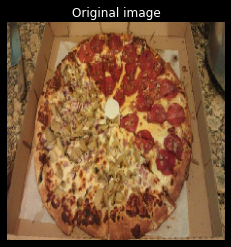

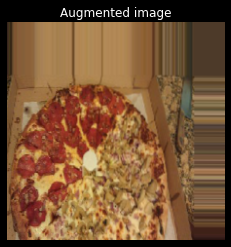

In [68]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Let's build a model and see how it learns on augmented data.

In [72]:
# Create the model
model_6 = Sequential([
  Conv2D(10,3, activation = "relu"),
  MaxPool2D(pool_size = 2),
  Conv2D(10,3 , activation = "relu"),
  MaxPool2D(),
  Conv2D(10,3, activation = "relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = "sigmoid")                      
])

# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented data
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 547ms/step - loss: 0.7067 - accuracy: 0.5567 - val_loss: 0.6788 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 26s 549ms/step - loss: 0.7515 - accuracy: 0.5227 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 26s 548ms/step - loss: 0.6917 - accuracy: 0.5067 - val_loss: 0.6834 - val_accuracy: 0.5600
Epoch 4/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6841 - accuracy: 0.5347 - val_loss: 0.6643 - val_accuracy: 0.5560
Epoch 5/5
47/47 [==============================] - 25s 540ms/step - loss: 0.6629 - accuracy: 0.5740 - val_loss: 0.6350 - val_accuracy: 0.6780


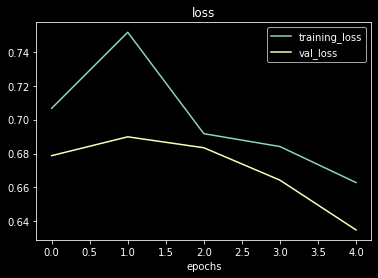

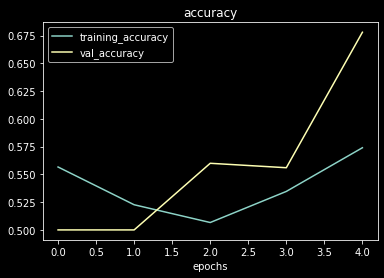

In [73]:
# Check our model's training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model(the same as before)

In [75]:
# Import data and augment it and shuffle from training directory
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle



Augmented training images:
Found 1500 images belonging to 2 classes.


In [105]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 30s 612ms/step - loss: 0.6597 - accuracy: 0.5953 - val_loss: 0.5916 - val_accuracy: 0.6720
Epoch 2/5
47/47 [==============================] - 26s 552ms/step - loss: 0.5980 - accuracy: 0.6833 - val_loss: 0.6378 - val_accuracy: 0.6280
Epoch 3/5
47/47 [==============================] - 26s 546ms/step - loss: 0.5257 - accuracy: 0.7380 - val_loss: 0.4047 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 35s 744ms/step - loss: 0.5384 - accuracy: 0.7367 - val_loss: 0.3878 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 34s 709ms/step - loss: 0.5049 - accuracy: 0.7607 - val_loss: 0.4293 - val_accuracy: 0.7920


We have hit an accuracy of around 77%!!

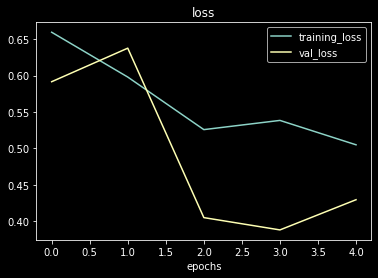

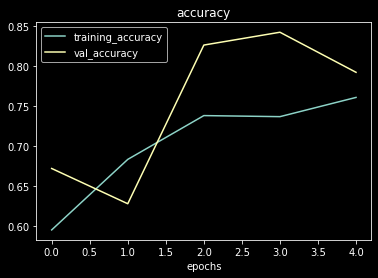

In [107]:
# Plot the training curves
plot_loss_curves(history_7)

> **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza then steak)

#### 7. Repeat the steps to get the best possible result(experiment, experiment, experiment)  

Since we've already improved a long way from our baseline, there are a few things we can try to continue to improve the model:  

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)  
* Increase the number of filters in each convolutional layers (e.g. from 10 to 32  or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data(give the model more oppurtunites to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

### Making a prediction with our trained model on our custom data

In [81]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-02-17 17:40:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2022-02-17 17:40:54 (26.7 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



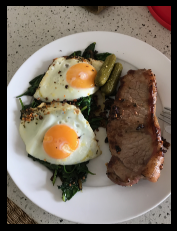

In [85]:
# View our image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [87]:
# Check the shape of our iamge
steak.shape

(4032, 3024, 3)

In [88]:
#collapse-output
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

> **Note:** We need to preprocess our custom data before predicting with our model. It is important that our custom data is preprocessed into the same format as the data our model was trained on.

In [97]:
# Create a helper function to import an image and resize it to be able to used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes
  it to (img_shape, colour_channels)
  """
  img = tf.io.read_file(filename)
  # Decode the read file into tensor
  img = tf.image.decode_image(img, channels =3)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image and get all values between 0 and 1
  img  = img/255.
  return img


In [108]:
#collapse-output
steak = load_and_prep_image("03-steak.jpeg",img_shape = 224)
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [109]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [110]:
# Make a prediction on custom image tensor
pred = model_7.predict(steak)
pred

array([[0.90207344]], dtype=float32)

Looks like our custom image is begin put through our model, however it currently outputs a prediction probability.

In [106]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [112]:
# We can index the predicted class by rounding the prediction probability and indexing it on classnames
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [115]:
def pred_and_plot(model,filename, class_names= class_names):
  """
  Import an image located at filename, makes a prediction with model
  and plots the image with predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # PLot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


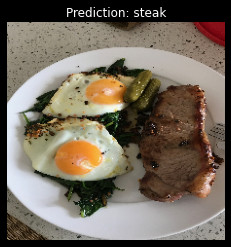

In [116]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Wow!! our model works on a custom image data. That is so cool!!

--2022-02-17 18:11:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-02-17 18:11:57 (35.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



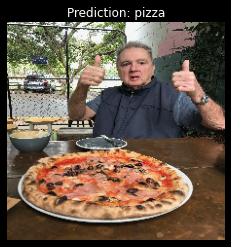

In [117]:
# Download another custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

Let's test on another random image pulled from the internet

--2022-02-17 18:15:06--  https://raw.githubusercontent.com/sandeshkatakam/My-Machine_learning-Blog/master/images/pizza-internet.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62115 (61K) [image/jpeg]
Saving to: ‘pizza-internet.jpg’

pizza-internet.jpg  100%[===================>]  60.66K  --.-KB/s    in 0.01s   

2022-02-17 18:15:06 (4.30 MB/s) - ‘pizza-internet.jpg’ saved [62115/62115]



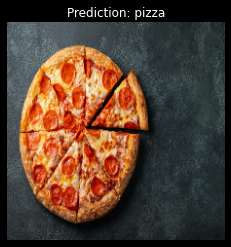

In [118]:
!wget https://raw.githubusercontent.com/sandeshkatakam/My-Machine_learning-Blog/master/images/pizza-internet.jpg
pred_and_plot(model_7, "pizza-internet.jpg")

Yayyy! Our model is very successful for images of pizza/steak from outside the dataset too.

In [119]:
model_7.save('pizza_steak_detect_model.h5')

## Multi-class Image Classification  
we've have already seen binary classification now we are going to level up with 10 classes of food.

1. Become one with the data
2. Preprocess the data(get it ready for model)
3. Create a model(start with a baseline model)
4. Fit the model(overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model(try to beat baseline/reduce overfitting)
7. Repeat until satisified.

### 1. Import data 

In [120]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2022-02-17 18:24:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   149MB/s    in 3.3s    

2022-02-17 18:24:06 (148 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [121]:
import os

# walk through 10 classes of food image data
for dirpath, dirnames, filenames, in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 

In [122]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Feb 17 18:24 .
drwxr-xr-x  1 root root 4096 Feb 17 18:24 ..
drwxr-xr-x 12 root root 4096 Feb 17 18:24 test
drwxr-xr-x 12 root root 4096 Feb 17 18:24 train


In [128]:
# setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [129]:
# Let's get the classnames
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


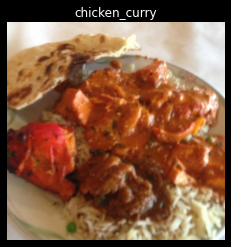

In [132]:
# Visualize 
import random
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

### 2. Preprocess the data(prepare it for a model)


In [137]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size= 32,
                                               class_mode ="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size= 32,
                                               class_mode ="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a Model(start with a baseline)

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [139]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
IMG_SIZE = (224,224) # Set as global variable for reuse 
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 output neurons and used softmax
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



### 4. Fit the Model

In [140]:
# Fit the model
history_8 = model_8.fit(train_data, #now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 67s 281ms/step - loss: 2.1563 - accuracy: 0.2025 - val_loss: 2.0711 - val_accuracy: 0.2468
Epoch 2/5
235/235 [==============================] - 59s 250ms/step - loss: 1.9543 - accuracy: 0.3121 - val_loss: 2.0008 - val_accuracy: 0.2944
Epoch 3/5
235/235 [==============================] - 76s 322ms/step - loss: 1.5549 - accuracy: 0.4741 - val_loss: 2.0152 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 72s 306ms/step - loss: 0.9483 - accuracy: 0.6879 - val_loss: 2.4873 - val_accuracy: 0.2820
Epoch 5/5
235/235 [==============================] - 57s 242ms/step - loss: 0.4002 - accuracy: 0.8753 - val_loss: 3.6105 - val_accuracy: 0.2640


### 5. Evaluate the Model

In [141]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 165ms/step - loss: 3.6105 - accuracy: 0.2640


[3.6105382442474365, 0.2639999985694885]

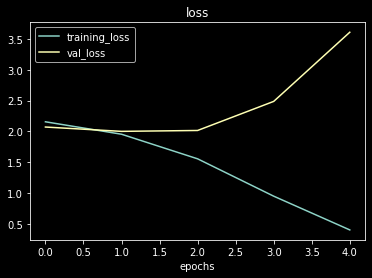

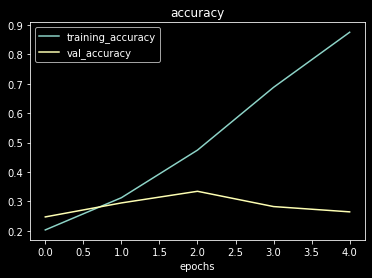

In [142]:
# Check out the model's loss curves
plot_loss_curves(history_8)

What do these loss curves tell us?

It seem our model is **overfitting** the training set badly.. in ohter words, it's getting great results on the training data but fails to genearlize well to unseen data and performs poorly on the test dataset.

### 6. Adjust the Hyperparamaters and Improve the model(to beat baseline/reduce overfitting)  

Due to its performance on the training data, it's clear our model is learning something..

However, it's not generalizing well to unseen data(overfitting)  

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more oppurtunity to learn diverse patterns...  
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # hidden units in layers. Since hidden units try to find more complex relationships in the train-data they may cause overfitting more for the train data.
* **Use data augmentation** - data augmentation manipulates the training  data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on a similar data set and use those patterns on your own dataset.


In [144]:
#Try and simplify the model 
# Let's try to remove 2 Conv layers
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')                        
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [145]:
model_9.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 29160)             0         
                                                                 
 dense_18 (Dense)            (None, 10)              

In [146]:
# Fit the model
history_9 = model_9.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 69s 289ms/step - loss: 2.1796 - accuracy: 0.2367 - val_loss: 1.9681 - val_accuracy: 0.3112
Epoch 2/5
235/235 [==============================] - 57s 240ms/step - loss: 1.7394 - accuracy: 0.4091 - val_loss: 1.8815 - val_accuracy: 0.3416
Epoch 3/5
235/235 [==============================] - 64s 271ms/step - loss: 1.3053 - accuracy: 0.5753 - val_loss: 2.0208 - val_accuracy: 0.3304
Epoch 4/5
235/235 [==============================] - 60s 257ms/step - loss: 0.8062 - accuracy: 0.7487 - val_loss: 2.4421 - val_accuracy: 0.3068
Epoch 5/5
235/235 [==============================] - 62s 264ms/step - loss: 0.4266 - accuracy: 0.8795 - val_loss: 2.8362 - val_accuracy: 0.3040


In [ ]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our simplifying the model experiment did not work.. the accuracy went down and overfitting continued..

Next, we try data augmentation.

### Trying to reduce overfitting with data augmentation  

Let's try and improve our model's results by using augmented training data...  
Ideally we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve the validation accuracy

In [157]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                             rotation_range= 0.2, # how much do you want to rotate an image?
                                             shear_range= 0.2, # how much do you want to shear an image?
                                             zoom_range= 0.2, # zoom in randomly on an image
                                             width_shift_range = 0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip= True) # flipping the image

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size =(224,224),
                                                                   batch_size = 32,
                                                                   class_mode = "categorical")

# Create ImageDataGenerator without datat augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale =1/255.)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size = 32,
                                             class_mode = "categorical")


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [160]:
# Let'c create another model to fit on our augmented dataset
model_10 = tf.keras.models.clone_model(model_9) # replicate the same model

# Compile the model
model_10.compile(loss = "categorical_crossentropy",
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])


In [161]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps= len(test_data))
                       

Epoch 1/5
235/235 [==============================] - 158s 670ms/step - loss: 2.2273 - accuracy: 0.1820 - val_loss: 2.1040 - val_accuracy: 0.2480
Epoch 2/5
235/235 [==============================] - 137s 584ms/step - loss: 2.0844 - accuracy: 0.2659 - val_loss: 2.0185 - val_accuracy: 0.2932
Epoch 3/5
235/235 [==============================] - 125s 534ms/step - loss: 2.0446 - accuracy: 0.2843 - val_loss: 1.8922 - val_accuracy: 0.3428
Epoch 4/5
235/235 [==============================] - 134s 571ms/step - loss: 1.9889 - accuracy: 0.3055 - val_loss: 1.8494 - val_accuracy: 0.3808
Epoch 5/5
235/235 [==============================] - 148s 631ms/step - loss: 1.9679 - accuracy: 0.3211 - val_loss: 1.7955 - val_accuracy: 0.4072


In [162]:
model_8.evaluate(test_data)

79/79 [==============================] - 16s 201ms/step - loss: 3.6105 - accuracy: 0.2640


[3.610537528991699, 0.2639999985694885]

In [164]:
model_10.evaluate(test_data)

79/79 [==============================] - 22s 274ms/step - loss: 1.7955 - accuracy: 0.4072


[1.795534610748291, 0.40720000863075256]

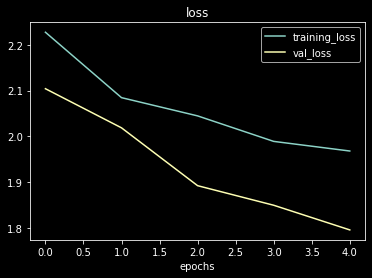

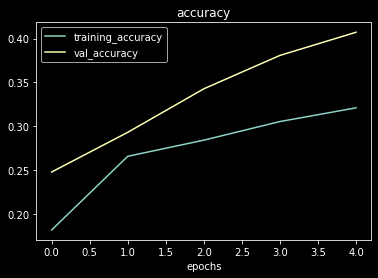

In [165]:
# Check out oure model tarined on augmented data's loss curves
plot_loss_curves(history_10)

Woah!! That result is much better, the loss curves are much closer to each ohter than the baseline model and they look line they'rea heading in the right direction. So, if we were to train for longer, we might see further improvements.

### 7. Repeat until satisfied  

we can still try to bring our loss curves closer together and trying to improve the validation/test accuracy.

By running lots of experiments:
- restructuring our model's architecture (increasing layers/hidden units)
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs or more)
- try **transfer learning**

### Making a prediction with our trained model on custom data  

Let's use our trained model to make some predictions on our own custom images.

In [163]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [166]:
#collapse-output
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-02-17 19:43:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.08s   

2022-02-17 19:43:18 (43.1 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

--2022-02-17 19:43:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [167]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model,filename, class_names= class_names):
  """
  Import an image located at filename, makes a prediction with model
  and plots the image with predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))

  
  # Add in logic for mulit-class
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  

  # PLot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



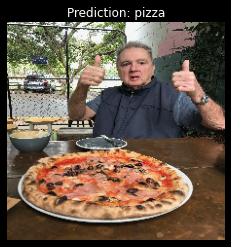

In [169]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename = "03-pizza-dad.jpeg",
              class_names = class_names)

This our model got it right!

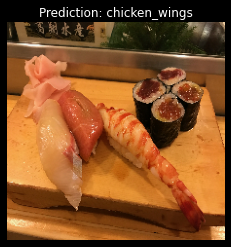

In [171]:
# Make a prediction using model_10
pred_and_plot(model = model_10,
              filename = "03-sushi.jpeg",
              class_names = class_names)

Looks, like our model got this wrong!  
This is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and Loading our Model

In [172]:
# Save a model
model_10.save("save_trained_model_10")

INFO:tensorflow:Assets written to: save_trained_model_10/assets


In [174]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("save_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 13s 155ms/step - loss: 1.7955 - accuracy: 0.4072


[1.795534372329712, 0.40720000863075256]

## Bibliography:

* [CNN Explainer](https://poloclub.github.io/cnn-explainer/)
* [TensorFlow Developer Certificate Udemy Course](https://www.udemy.com/course/tensorflow-developer-certificate-machine-learning-zero-to-mastery/)
* [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.46285&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)